In [43]:
import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


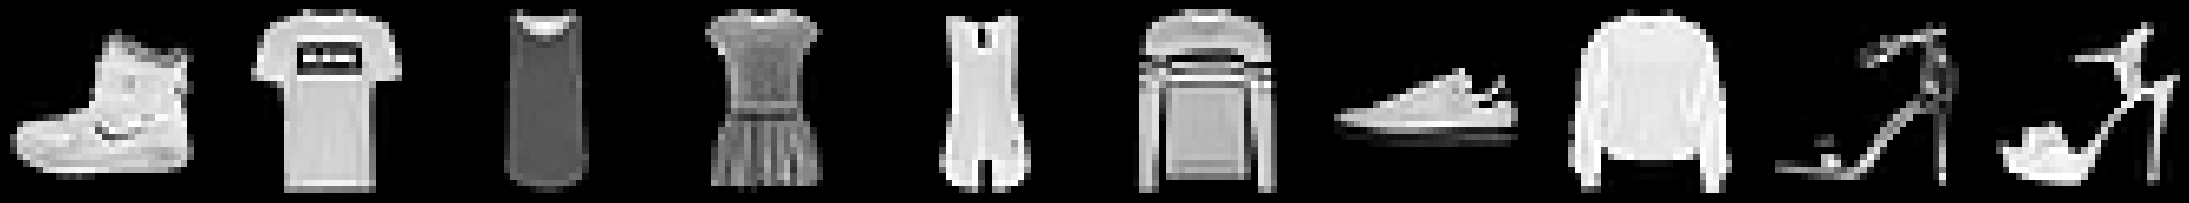

In [44]:
import matplotlib.pyplot as plt

fig, axg = plt.subplots(1, 10, figsize=(28, 28))
for i in range(10):
    axg[i].imshow(train_input[i], cmap='gray')
    axg[i].axis('off')
plt.show()

In [45]:
print(train_target[:10])

[9 0 0 3 0 2 7 2 5 5]


In [46]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [47]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
print(train_scaled.shape)

(60000, 784)


In [48]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5, random_state=42)
score = cross_validate(sc, train_scaled, train_target, n_jobs=1)
print(score['test_score'])

C:\Users\DH\Desktop\python\ML\.venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:733: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [49]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [50]:
inputs = keras.layers.Input(shape=(784,))
dense = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([inputs, dense])
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(train_scaled, train_target, epochs=5)

In [52]:
model.evaluate(val_scaled, val_target)

[0.48115062713623047, 0.8318333625793457]